<h1> Experiment reflection against UV cutoff </h1>

In [9]:
#General imports
resol = 300
pi = np.pi
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.linewidth": 0.7,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
})

import sys
import numpy as np
from pathlib import Path

project_root = Path().resolve().parents[1]
sys.path.append(str(project_root))

#Local imports

from single_photon_renormalization.scripts_experiments.reflection_convergence import run_reflection_convergence

<h2> Execute the experiment </h2>

Define the parameters 

In [2]:
#Parameters of the simulation

param_photon = {'omega_p': 10*np.pi, 'delta_k': 0.05*np.pi, 'x_0': -25}  

param_cavity = {'omega_0': 10*np.pi, 'gamma': np.pi, 'L': 100}

param_time_evol = {'T': 50, 'dt': 0.01}

#Different values for UV cutoff, IR cutoff set to zero

nb_UV_pts = 30
uv_cutoff_values = np.linspace(1.25*param_cavity['omega_0'], 10*param_cavity['omega_0'], nb_UV_pts)

Run the experiment

In [3]:
uv_cutoff_values, final_reflection_tab = run_reflection_convergence(param_photon, param_cavity, param_time_evol, uv_cutoff_values, 
                                                                    store_results=True, progress=True)

100%|██████████| 30/30 [00:57<00:00,  1.93s/it]


<h2> Plot the results </h2>

Load the data

In [7]:
data_file = f"../results/csv_files/reflection_convergence.csv"
df = pd.read_csv(data_file)
uv_cutoff_tab = df['uv_cutoff_tab'].values
final_reflection_tab = df['final_reflection_tab'].values

Create the figure

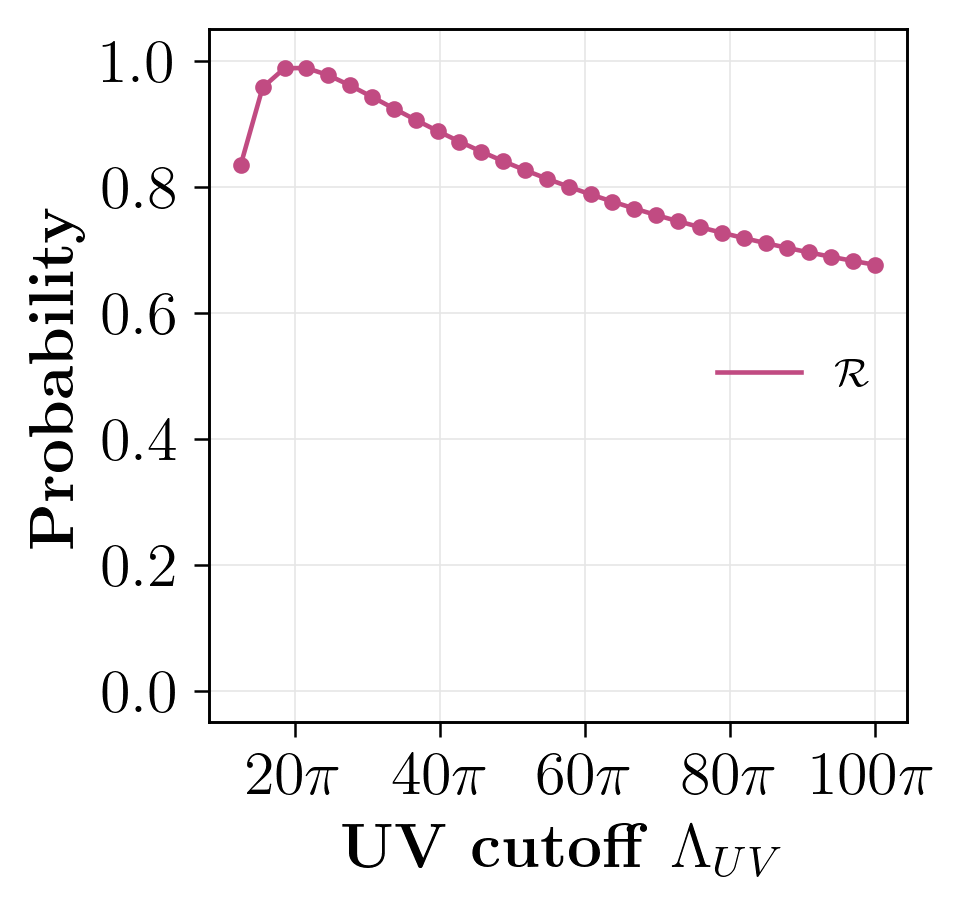

In [11]:
color = "#c14b82"

# Création de la figure
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

# ---- courbes lisses ----
ax.plot(uv_cutoff_tab, final_reflection_tab, '-', color=color, lw=1.1, label=r'$\mathcal{R}$')

# ---- marqueurs discrets ----
ax.plot(uv_cutoff_tab, final_reflection_tab, 'o', ms=3, color=color)

# Labels, limites et grille
ax.set_xlabel(r'\textbf{UV cutoff} $\Lambda_{UV}$', fontsize=10)
ax.set_ylabel(r'\textbf{Probability}', fontsize=10)

ax.set_xticks([20*pi,40*pi,60*pi,80*pi,100*pi])
ax.set_xticklabels([r"$20\pi$",r"$40\pi$",r"$60\pi$",r"$80\pi$",r"$100\pi$"])


ax.set_ylim(-0.05, 1.05)
ax.grid(color='0.9', linestyle='-', linewidth=0.4)

# Légende sobre
ax.legend(prop={'size': 10}, loc="center right", frameon=False)

#font size
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(15)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

plt.savefig("../results/fig/photon_reflection_resonance_UV_dependence.pdf", bbox_inches="tight")
plt.show()